# Preprocessing



In [1]:
import pandas as pd

#loading the data
data = pd.read_csv("final_data.csv")

data["index"] = data.index
data["index_opponent"] = data.index

#Inspecting the data
data.head()

,team,Win,season,FG%_last_five_reg,2PA_last_five_reg,2P%_last_five_reg,3P%_last_five_reg,FT%_last_five_reg,eFG%_last_five_reg,3PAr_last_five_reg,...,assist_percentage_opponent,steal_percentage_opponent,block_percentage_opponent,eFG_opponent,tov_percentage_opponent,oreb_percentage_opponent,ft_per_fga_opponent,team_code_opponent,index,index_opponent
0,yale,0,2019,0.4750,38.4,0.5150,0.3992,0.7870,0.5474,0.3658,...,45.7,12.2,11.8,0.512,15.1,36.2,0.279,louisiana-state,0,0
1,wofford,1,2019,0.4802,32.6,0.5110,0.4486,0.7732,0.5834,0.4638,...,51.7,9.7,11.2,0.499,15.2,29.6,0.243,seton-hall,1,1
2,wofford,0,2019,0.4802,32.6,0.5110,0.4486,0.7732,0.5834,0.4638,...,51.2,8.8,13.4,0.530,15.9,36.4,0.310,kentucky,2,2
3,wisconsin,0,2019,0.4136,40.6,0.4672,0.3118,0.6334,0.4622,0.3186,...,52.3,11.6,14.6,0.520,15.4,29.1,0.212,oregon,3,3
4,washington,1,2019,0.4378,32.4,0.4956,0.3572,0.6342,0.5086,0.3954,...,62.4,8.7,12.2,0.538,15.8,31.9,0.274,utah-state,4,4


**Splitting the Data into Team and Opponent for PCA:** Each row has game stats for home the team and the away team, so when conducting the PCA we decided to split the stats into two groups.

In [2]:
from sklearn.preprocessing import StandardScaler

#Splitting the Opponents Data
opps_data = data.filter(regex='opponent')

#examining the data
opps_data.describe()

#Selecting the teams columns
teams_data = data.loc[:,~data.columns.str.contains('opponent')]

opps_data["season"] = teams_data["season"]

#Remove the y variable
teams_data = teams_data.drop("Win", axis = 1)

#Viewing the team data
teams_data.head()


<ipython-input-2-a5fba11f0505>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opps_data["season"] = teams_data["season"]


,team,season,FG%_last_five_reg,2PA_last_five_reg,2P%_last_five_reg,3P%_last_five_reg,FT%_last_five_reg,eFG%_last_five_reg,3PAr_last_five_reg,FTr_last_five_reg,...,3PAr,rebound_percentage,assist_percentage,steal_percentage,block_percentage,eFG,tov_percentage,oreb_percentage,ft_per_fga,index
0,yale,2019,0.4750,38.4,0.5150,0.3992,0.7870,0.5474,0.3658,0.2696,...,0.350,52.9,56.3,8.0,11.2,0.556,15.9,25.8,0.227,0
1,wofford,2019,0.4802,32.6,0.5110,0.4486,0.7732,0.5834,0.4638,0.2562,...,0.436,54.5,50.6,9.6,9.1,0.580,13.5,32.5,0.190,1
2,wofford,2019,0.4802,32.6,0.5110,0.4486,0.7732,0.5834,0.4638,0.2562,...,0.436,54.5,50.6,9.6,9.1,0.580,13.5,32.5,0.190,2
3,wisconsin,2019,0.4136,40.6,0.4672,0.3118,0.6334,0.4622,0.3186,0.3576,...,0.346,49.8,49.2,7.9,11.0,0.511,13.0,24.3,0.177,3
4,washington,2019,0.4378,32.4,0.4956,0.3572,0.6342,0.5086,0.3954,0.3274,...,0.399,47.6,47.5,13.3,16.3,0.521,17.4,28.8,0.241,4


**Scaling data**

In [3]:
#selecting only the numeric columns
num_opps = opps_data.select_dtypes(include='number')
num_teams = teams_data.select_dtypes(include='number')

#Drop the season column from num_teams and num_opps
num_opps = num_opps.drop(["season", "index_opponent"], axis = 1)
num_teams = num_teams.drop(["season", "index"], axis = 1)

#Scaling the Data
ss = StandardScaler()

#team data
ss_teams = ss.fit_transform(num_teams)



#opponents
ss_opp = ss.fit_transform(num_opps)


**KMeans**

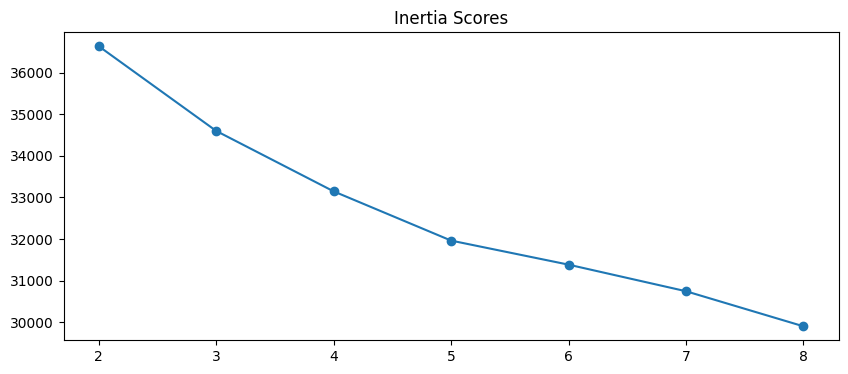

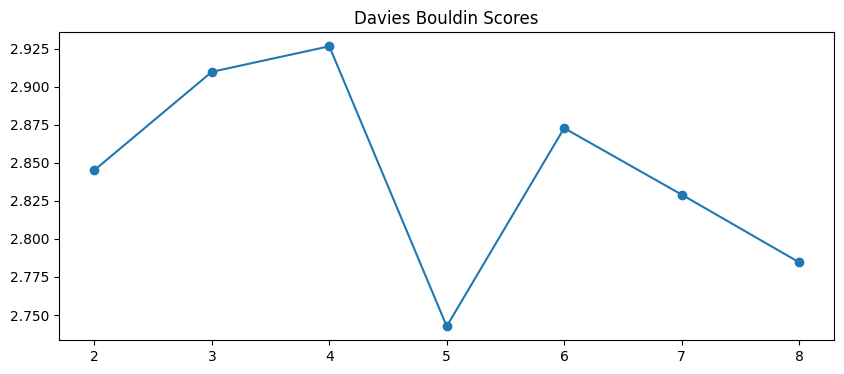

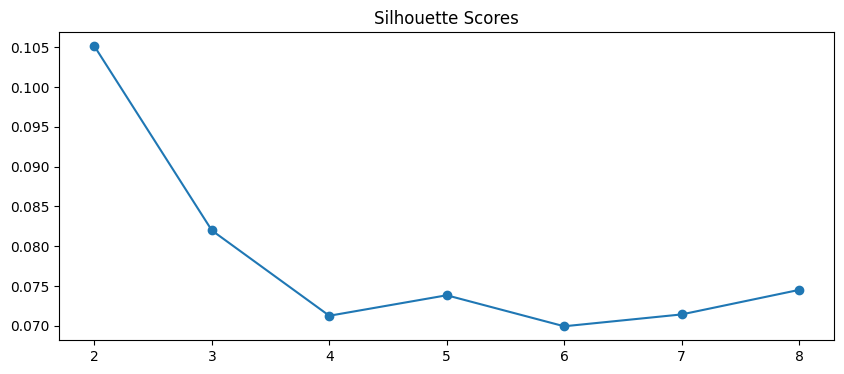

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples
import numpy as np
import matplotlib.pyplot as plt


#Testing k values from 2-9
k_range = range(2,9)

#where to store silhouette score and inertia results
scores = []
inertia =[]
db_score =[]


#using a loop to set up the model and test for the silhouette score
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42) #Setting up the model
    km_model = kmeans.fit_predict(ss_teams) #fitting to the data
    km_labels = kmeans.labels_

#performence metrics
    sil_s = silhouette_score(ss_teams, km_model) #calculating Sil score
    dbs = davies_bouldin_score(ss_teams, km_model)
    scores.append(sil_s)
    inertia.append(kmeans.inertia_)
    db_score.append(dbs)

#Plotting Inertia score
plt.figure(figsize=(10,4))
plt.plot(k_range, inertia, marker='o')
plt.title('Inertia Scores')
plt.show()


#Plotting DB score
plt.figure(figsize=(10,4))
plt.plot(k_range, db_score, marker='o')
plt.title('Davies Bouldin Scores')
plt.show()



#Plotting Silhouette score
plt.figure(figsize=(10,4))
#plt.plot(k_range, inertia, marker='o')
plt.plot(k_range, scores, marker='o')
plt.title('Silhouette Scores')
plt.show()
#Source: https://www.youtube.com/watch?v=ARjx__t5OCI&t=11s

In this section we begin to cluster the reduced teams data using k-means. In order to determine the best number of clusters to use, we used the inertia, Davis Bouldin and Silhouette Score method. The results of the analyses indicated that using 5 clusters produced the best results, evidence of this can be seen with the inertia results where the elbow is located at 5. Similarly, the Davis Bouldin plot, produced the lowest score when using 6 clusters followed by 5. Finally, with the silhouette score, the highest value was found when we create 2 clusters, followed by 3 and then 5. Across all 3 methods, 5 clusters consistently produced high performing results, which is what we went with in the end.

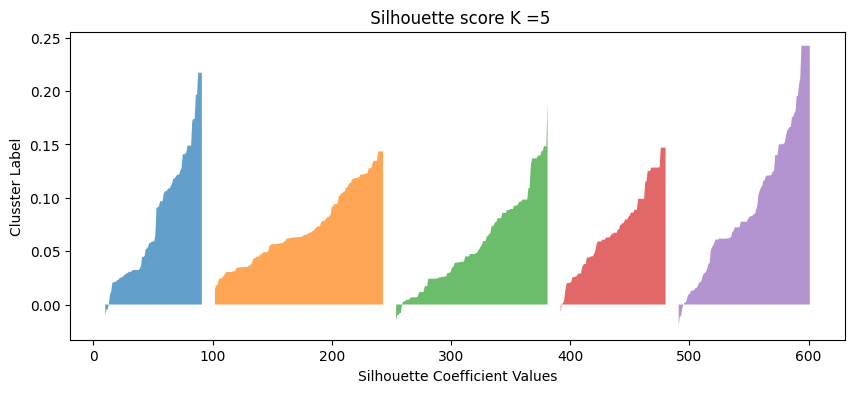

In [5]:
k_5 = 5
km_5 = KMeans(n_clusters=k_5, random_state = 4142025)
km_labels = km_5.fit_predict(ss_teams)

teams_data["team_cluster"] = km_labels

#Compute silhouette score for each sample
sample_sil_values = silhouette_samples(ss_teams, km_labels)

#Creating a silhouette plot
fig, ax, = plt.subplots(figsize=(10,4))
y_lower = 10

for i in range(k_5):
        ith_cluster_sil_value = sample_sil_values[km_labels == i]
        ith_cluster_sil_value.sort()
        size_cluster_i = ith_cluster_sil_value.shape[0]
        y_upper = y_lower + size_cluster_i
        ax.fill_between(np.arange(y_lower, y_upper), 0, ith_cluster_sil_value, alpha=0.7)
        y_lower = y_upper + 10


ax.set_title(f' Silhouette score K ={k_5}')
ax.set_xlabel('Silhouette Coefficient Values')
ax.set_ylabel('Clusster Label')
plt.show()

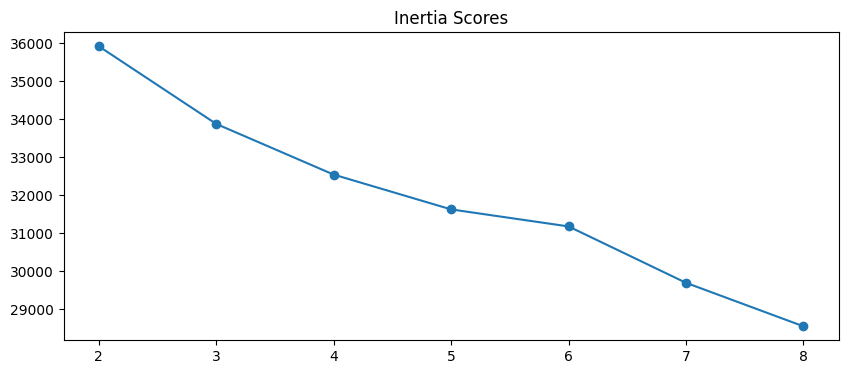

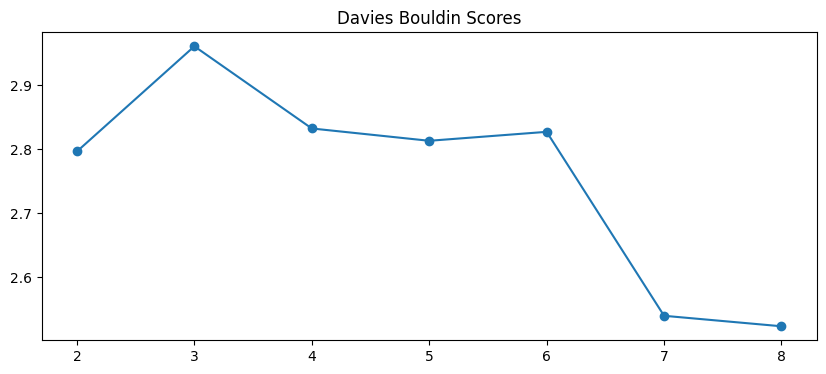

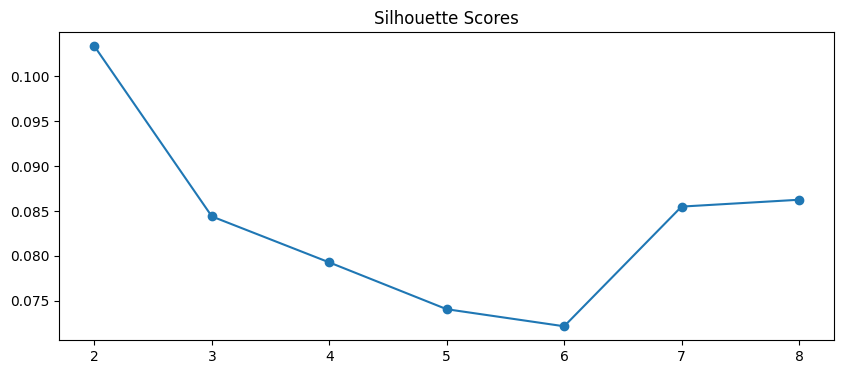

In [6]:
#where to store silhouette score and inertia results
scores = []
inertia =[]
db_score =[]


#using a loop to set up the model and test for the silhouette score
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=4142025) #Setting up the model
    km_model = kmeans.fit_predict(ss_opp) #fitting to the data
    km_labels = kmeans.labels_

#performence metrics
    sil_s = silhouette_score(ss_opp, km_model) #calculating Sil score
    dbs = davies_bouldin_score(ss_opp, km_model)
    scores.append(sil_s)
    inertia.append(kmeans.inertia_)
    db_score.append(dbs)

#Plotting Inertia score
plt.figure(figsize=(10,4))
plt.plot(k_range, inertia, marker='o')
plt.title('Inertia Scores')
plt.show()


#Plotting DB score
plt.figure(figsize=(10,4))
plt.plot(k_range, db_score, marker='o')
plt.title('Davies Bouldin Scores')
plt.show()



#Plotting Silhouette score
plt.figure(figsize=(10,4))
#plt.plot(k_range, inertia, marker='o')
plt.plot(k_range, scores, marker='o')
plt.title('Silhouette Scores')
plt.show()
#Sourece: https://www.youtube.com/watch?v=ARjx__t5OCI&t=11s

<ipython-input-7-785f0950d5ff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opps_data["opponent_cluster"] = km_labels


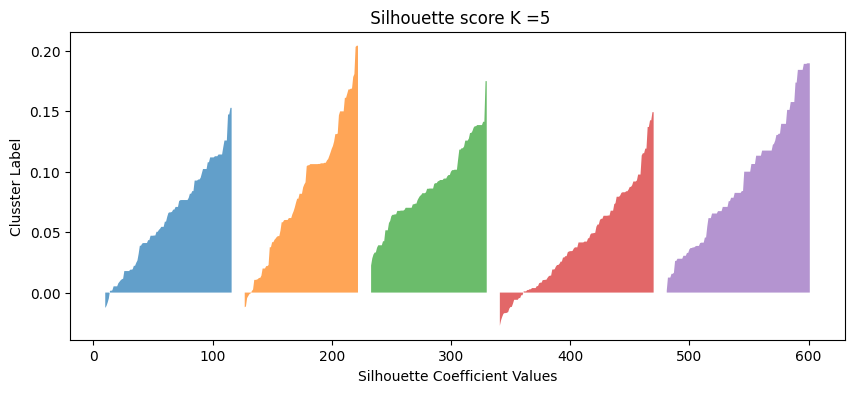

In [7]:
#Calculating the Silhouette coefficent for each sample
k_5 = 5
km_5 = KMeans(n_clusters=k_5, random_state=42)
km_labels = km_5.fit_predict(ss_opp)

opps_data["opponent_cluster"] = km_labels

#Compute silhouette score for each sample
sample_sil_values = silhouette_samples(ss_opp, km_labels)

fig, ax, = plt.subplots(figsize=(10,4))
y_lower = 10


for i in range(k_5):
        ith_cluster_sil_value = sample_sil_values[km_labels == i]
        ith_cluster_sil_value.sort()
        size_cluster_i = ith_cluster_sil_value.shape[0]
        y_upper = y_lower + size_cluster_i
        ax.fill_between(np.arange(y_lower, y_upper), 0, ith_cluster_sil_value, alpha=0.7)
        y_lower = y_upper + 10


ax.set_title(f' Silhouette score K ={k_5}')
ax.set_xlabel('Silhouette Coefficient Values')
ax.set_ylabel('Clusster Label')
plt.show()

In [8]:
all_data = pd.merge(teams_data, opps_data, left_on = "index", right_on = "index_opponent")

all_data["Win"] = data["Win"]

all_data.to_csv("all_data.csv", index = False)


**Prrinciple Component Analysis: PCA**

In [9]:
test = data[(data["season"] == 2024) | (data["season"] == 2025)]
train = data[~(data["season"] == 2024) & ~(data["season"] == 2025)]

train_y = train["Win"]
train_x = train.drop(columns = "Win", axis = 1)

test_y = test["Win"]
test_x = test.drop(columns = "Win", axis = 1)

#Splitting the Opponents Data
train_opps_data = train_x.filter(regex='opponent')
#Splitting the Opponents Data
test_opps_data = test_x.filter(regex='opponent')


#examining the data
train_opps_data.describe()

#Selecting the teams columns
train_teams_data = train_x.loc[:,~train_x.columns.str.contains('opponent')]

#test
test_teams_data = test_x.loc[:,~test_x.columns.str.contains('opponent')]



In [10]:
#selecting only the numeric columns
train_num_opps = train_opps_data.select_dtypes(include='number')
train_num_teams = train_teams_data.select_dtypes(include='number')

#Drop the season column from num_teams
train_num_teams = train_num_teams.drop("season", axis = 1)

#Scaling the Data
ss_t = StandardScaler()

#team data
train_ss_teams = ss_t.fit_transform(train_num_teams)

ss_opps = StandardScaler()

#opponents
train_ss_opp = ss_opps.fit_transform(train_num_opps)



#test data
test_num_opps = test_opps_data.select_dtypes(include='number')
test_num_teams = test_teams_data.select_dtypes(include='number')


#Drop the season column from num_teams
test_num_teams = test_num_teams.drop("season", axis = 1)

#Scaling the Data
ss_t_test = StandardScaler()

#team data
test_ss_teams = ss_t_test.fit_transform(test_num_teams)

#opps
ss_opps_test = StandardScaler()

#opponents
test_ss_opp = ss_opps_test.fit_transform(test_num_opps)


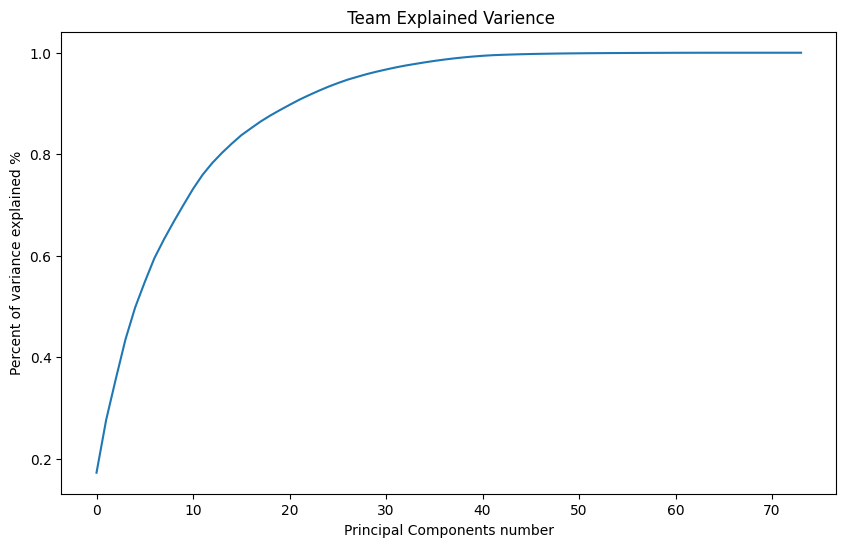

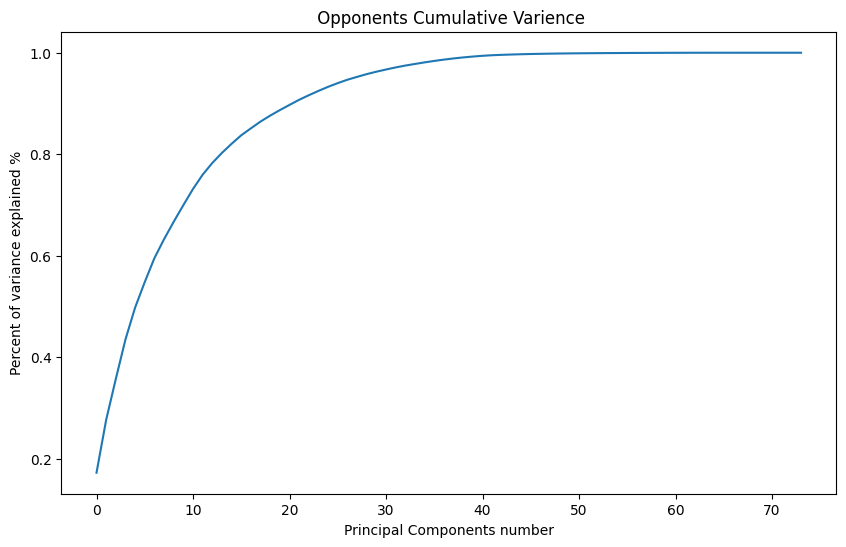

Number of components needed for 95.0% variance: 28
Number of components needed for 95.0% variance: 28


In [11]:
from sklearn.decomposition import PCA

#Setting up the PCA
pca = PCA()

#team pca
team_pca = pca.fit(train_ss_teams)
team_pca_t = team_pca.transform(train_ss_teams)


#opp pca
opp_pca = pca.fit(train_ss_opp)
opps_pca_t = team_pca.transform(train_ss_opp)


#Explained Varience
team_var = team_pca.explained_variance_ratio_
opps_var = opp_pca.explained_variance_ratio_

#print('Varience Explained per Prinicpal Comp', team_var)
#print('Varience Explained per Prinicpal Comp', opps_var)

#team Var
cumlative_var_exp_team = np.cumsum(team_var)

#Opponents cumulative var
cumlative_var_exp_opp = np.cumsum(opps_var)


threshold = 0.95
n_comp_teams = np.argmax(cumlative_var_exp_team >= threshold) + 1
n_comp_opp = np.argmax(cumlative_var_exp_team >= threshold) + 1

#Creating a plot
plt.figure(figsize=(10,6))
plt.plot(cumlative_var_exp_team, label="Teams")
plt.title(' Team Explained Varience')
plt.xlabel('Principal Components number')
plt.ylabel('Percent of variance explained %')
plt.show()


#Creating a plot
plt.figure(figsize=(10,6))
plt.plot(cumlative_var_exp_opp, label="Teams")
plt.title(' Opponents Cumulative Varience')
plt.xlabel('Principal Components number')
plt.ylabel('Percent of variance explained %')
plt.show()


print(f"Number of components needed for {threshold*100}% variance: {n_comp_teams}")
print(f"Number of components needed for {threshold*100}% variance: {n_comp_opp}")


The code above works to initiate the PCA on the teams and the opponents dataset and calculate the cumulative explained variance ratio. Since we are working to preserve variance, we set the threshold to 95% and calculated the number of principal components needed to preserve that much variance. Based on the plots and the text output, for both the opponent and teams datasets, in order to preserve 95% variance 27 principle components are needed.

**Final PCA using n=27**

In [12]:
#Setting up the PCA using 27 components
pca_final = PCA(n_components=27)

#team pca
train_team_pca = pca_final.fit(train_ss_teams)
train_team_pca_final = train_team_pca.transform(train_ss_teams)


pca_opps_final = PCA(n_components=27)

#opp pca
opp_pca = pca_opps_final.fit(train_ss_opp)
train_opps_pca_final = opp_pca.transform(train_ss_opp)


#test Data
test_team_pca_final = train_team_pca.transform(test_ss_teams)

#opp pca
test_opps_pca_final = opp_pca.transform(test_ss_opp)


**Data Visualization**

IndexError: index 421 is out of bounds for axis 0 with size 421

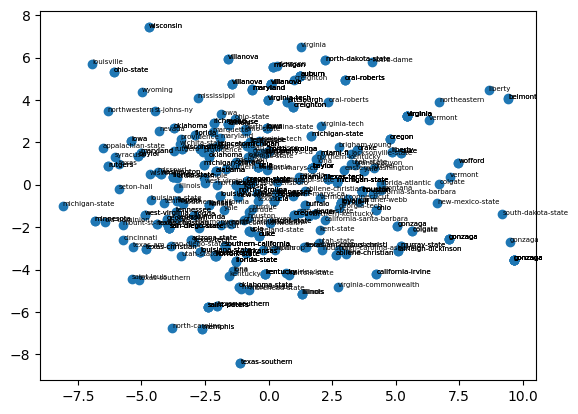

In [13]:

#Plotting Teams
plt.scatter(train_team_pca_final[:, 0], train_team_pca_final[:, 1])
for i, team in enumerate(data['team']):
    plt.text(train_team_pca_final[i, 0], train_team_pca_final[i, 1], team, fontsize=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Teams PCA ')
plt.show()


plt.scatter(train_opps_pca_final[:, 0], train_opps_pca_final[:, 1])
for i, team in enumerate(data['team']):
    plt.text(train_opps_pca_final[i, 0], train_opps_pca_final[i, 1], team, fontsize=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Opponents PCA')
plt.show()


The code above works to plot PCA results using 27 components for both the team and the opponent data. The labels for each point correspond to the team name.

**Final K-Means Cluster: teams**

In [14]:
# Assign opponent_cluster and team_cluster directly by index alignment
train_opps_data = train_opps_data.copy()
train_teams_data = train_teams_data.copy()
test_opps_data = test_opps_data.copy()
test_teams_data = test_teams_data.copy()

train_opps_data["opponent_cluster"] = opps_data.loc[train_opps_data.index, "opponent_cluster"]
train_teams_data["team_cluster"] = teams_data.loc[train_teams_data.index, "team_cluster"]

test_opps_data["opponent_cluster"] = opps_data.loc[test_opps_data.index, "opponent_cluster"]
test_teams_data["team_cluster"] = teams_data.loc[test_teams_data.index, "team_cluster"]


In [15]:
from sklearn.preprocessing import OneHotEncoder

teams_cluster = teams_data[~(teams_data["season"] == 2024) & ~(teams_data["season"] == 2025)]["team_cluster"]
team_cluster_labels = teams_cluster.values.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)  # Set sparse=False to get a NumPy array
team_cluster_encoded = encoder.fit_transform(team_cluster_labels)

train_team_pca_final = np.hstack((train_team_pca_final, team_cluster_encoded))

opps_cluster = opps_data[~(opps_data["season"] == 2024) & ~(opps_data["season"] == 2025)]["opponent_cluster"]
opps_cluster_labels = opps_cluster.values.reshape(-1, 1)

opps_cluster_encoded = encoder.transform(opps_cluster_labels)

train_opps_pca_final = np.hstack((train_opps_pca_final, opps_cluster_encoded))



#test
test_teams_cluster = teams_data.loc[teams_data["season"].isin([2024, 2025]), "team_cluster"]
team_cluster_labels_test = test_teams_cluster.values.reshape(-1, 1)

team_cluster_encoded_test = encoder.transform(team_cluster_labels_test)

test_team_pca_final = np.hstack((test_team_pca_final, team_cluster_encoded_test))


test_opps_cluster = opps_data.loc[opps_data["season"].isin([2024, 2025]), "opponent_cluster"]

opps_cluster_labels_test = test_opps_cluster.values.reshape(-1, 1)

opps_cluster_encoded_test = encoder.transform(opps_cluster_labels_test)

test_opps_pca_final = np.hstack((test_opps_pca_final, opps_cluster_encoded_test))

IndexError: index 421 is out of bounds for axis 0 with size 421

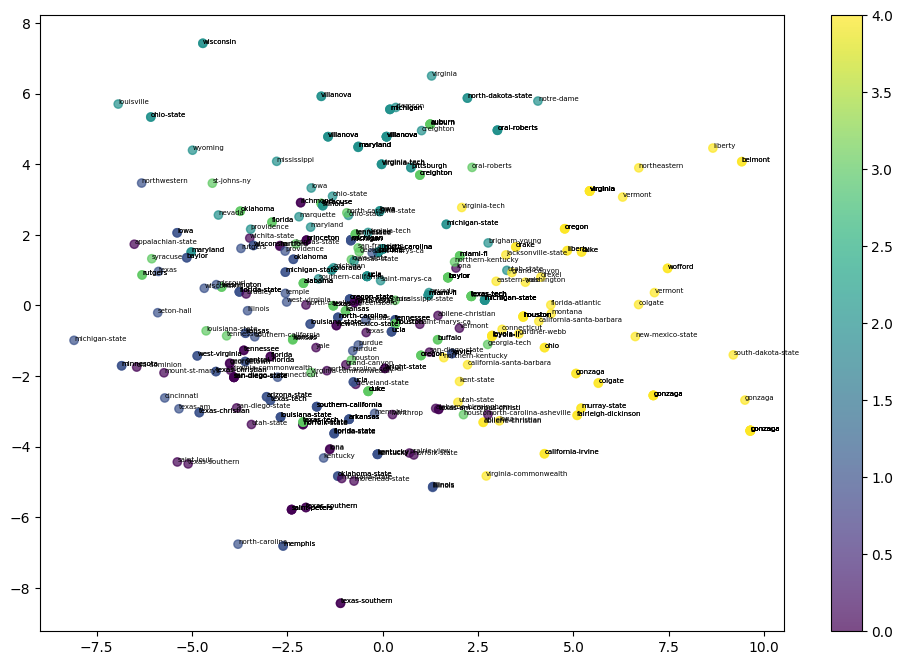

In [16]:
#Running the K-means for teams

kmeans_final = KMeans(n_clusters=5, random_state=42)
team_clusters = kmeans_final.fit_predict(train_team_pca_final)


#Plotting the 5 clusters
plt.figure(figsize=(12,8))
scatter = plt.scatter(train_team_pca_final[:, 0], train_team_pca_final[:, 1], c=train_teams_data["team_cluster"], cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
for i, team in enumerate(data['team']):
    plt.text(train_team_pca_final[i, 0], train_team_pca_final[i, 1], team, fontsize=5)
plt.title("Teams KMeans clustering using K=5")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()




IndexError: index 421 is out of bounds for axis 0 with size 421

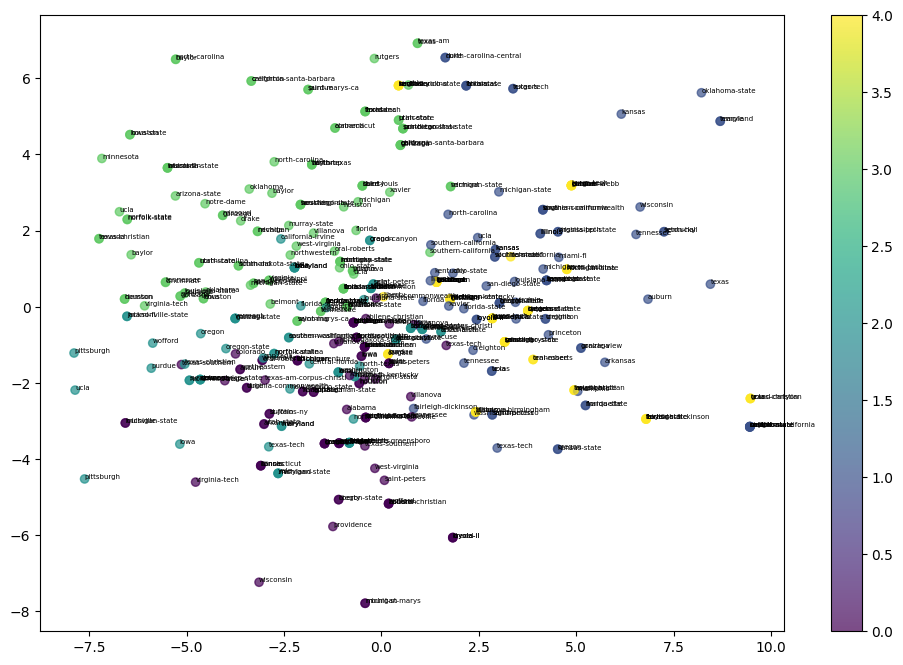

In [17]:
#Running the K-means for opps

kmeans_final = KMeans(n_clusters=5, random_state=42)
opp_clusters = kmeans_final.fit_predict(train_opps_pca_final)

#Plotting the 5 clusters
plt.figure(figsize=(12,8))
scatter = plt.scatter(train_opps_pca_final[:, 0], train_opps_pca_final[:, 1], c=train_opps_data["opponent_cluster"], cmap='viridis', alpha=0.7) #I used chatgpt to help figure out how to seperate the clusters by color
plt.colorbar(scatter)
for i, team in enumerate(data['team']):
    plt.text(train_opps_pca_final[i, 0], train_opps_pca_final[i, 1], team, fontsize=5)
plt.title("Opponent k-Means clustering using K=5")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The following code works to perform clustering for the reduced Opponents data, using k-means, with 5 clusters. This data contains the statistical performance of the opponent team faced by the main team, examined in the previous step. Similar to the teams data, there is no clearly defined structure to the majority of the clusters, with many data points being scattered across the plot. Majority of points are located near the center, which might suggest the opponent team they faced has a similar ranking to them. While teams located on the outskirts, may have faced teams with significantly higher rankings than them, which is why the stats vary so much from the rest.

In [18]:
train_input_data = np.hstack((train_team_pca_final, train_opps_pca_final))

test_input_data = np.hstack((test_team_pca_final, test_opps_pca_final))

# Modeling

**Logistic Regression**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()
y = train["Win"]
model.fit(train_input_data, y)
y_pred = model.predict(train_input_data)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y, y_pred)
print(f"F1: {f1}")

scores = cross_val_score(model, train_input_data, y, cv=5, scoring='accuracy')

print("Accuracy scores for each fold:", scores)
print("Average Accuracy score:", scores.mean())

scores = cross_val_score(model, train_input_data, y, cv=5, scoring='f1')

print("F1 scores for each fold:", scores)
print("Average F1 score:", scores.mean())

**SVC**

In [ ]:
from sklearn.svm import SVC

model2 = SVC(kernel='rbf', C=1.0, gamma='scale')

model2.fit(train_input_data, y)

y_pred2 = model2.predict(train_input_data)

scores = cross_val_score(model2, train_input_data, y, cv=5, scoring='accuracy')

print("Accuracy scores for each fold:", scores)
print("Average Accuracy score:", scores.mean())

scores = cross_val_score(model2, train_input_data, y, cv=5, scoring='f1')

print("F1 scores for each fold:", scores)
print("Average F1 score:", scores.mean())

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': ['scale', 'auto', 0.01, 0.1, 1], 
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the model with the best parameters
grid_search.fit(train_input_data, y)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(train_input_data)

cv_scores2 = cross_val_score(best_model, train_input_data, y, scoring='f1', cv =5)
print(cv_scores2)
print("Average:", cv_scores2.mean()) 

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

rfc_model = RandomForestClassifier(n_estimators=42, class_weight='balanced')

rfc_model.fit(train_input_data, train_y)

#Predicting
y_pred = rfc_model.predict(test_input_data)


#Performance Metrics
acc_score  = accuracy_score(test_y, y_pred)


f1_results = f1_score(test_y, y_pred)

precision_s = precision_score(test_y, y_pred)

recall = recall_score(test_y, y_pred)

cross_score = cross_val_score(rfc_model, train_input_data, train_y, scoring='f1', cv=5)


print("Accuracy:", acc_score)
print("F1 Score:", f1_results)
print("Precision:", precision_s)
print("Recall:", recall)
print("Cross-Validated F1 Scores (5-fold):", cross_score)

Accuracy: 0.6870229007633588
F1 Score: 0.5494505494505495
Precision: 0.5952380952380952
Recall: 0.5102040816326531
Cross-Validated F1 Scores (5-fold): [0.60526316 0.48484848 0.68888889 0.71604938 0.62337662]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

p_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(rfc_model, p_grid, scoring='f1', cv=5)

grid_search.fit(train_input_data, train_y)
best_parms = grid_search.best_params_
print(best_parms)


{'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:

#Final model
rfc_final = RandomForestClassifier(class_weight=None, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=150)

rfc_final.fit(train_input_data, train_y)

#Predicting
y_pred = rfc_final.predict(test_input_data)


#Accuracy Score
acc_score = cross_val_score(rfc_final, train_input_data, train_y, cv=5, scoring='accuracy')

#Average acc
avg_acc = acc_score.mean()


f1_results = f1_score(test_y, y_pred)

precision_s = precision_score(test_y, y_pred)

recall = recall_score(test_y, y_pred)

cross_score = cross_val_score(rfc_final, train_input_data, train_y, scoring='f1', cv=5)

print("Accuracy 5-fold:", acc_score)
print("Average Accuracy:", avg_acc)
print("F1 Score:", f1_results)
print("Precision:", precision_s)
print("Recall:", recall)
print("Cross-Validated F1 Scores (5-fold):", cross_score)

Accuracy 5-fold: [0.57647059 0.5952381  0.69047619 0.69047619 0.6547619 ]
Average Accuracy: 0.641484593837535
F1 Score: 0.6666666666666666
Precision: 0.7045454545454546
Recall: 0.6326530612244898
Cross-Validated F1 Scores (5-fold): [0.63736264 0.53125    0.70588235 0.72289157 0.55263158]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': ['balanced']
}

#Random search cv
random_search = RandomizedSearchCV(rfc_model, param_distributions=param_dist, n_iter=30,
                                   scoring='f1',cv=5,verbose=1,random_state=42,n_jobs=-1)

# Fit the randomized search
random_search.fit(train_input_data, train_y)

print(random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 16, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 185}


In [21]:

# Making predictions with the model

best_rfc = random_search.best_estimator_

best_rfc.fit(train_input_data, train_y)

#Predicting
y_pred = best_rfc.predict(test_input_data)

#Accuracy Score
acc_score = cross_val_score(best_rfc, train_input_data, train_y, cv=5, scoring='accuracy')

#Average acc
avg_acc = acc_score.mean()

f1_results = f1_score(test_y, y_pred)

precision_s = precision_score(test_y, y_pred)

recall = recall_score(test_y, y_pred)

cross_score = cross_val_score(best_rfc, train_input_data, train_y, scoring='f1', cv=5)

print("Accuracy 5-fold:", acc_score)
print("Average Accuracy:", avg_acc)
print("F1 Score:", f1_results)
print("Precision:", precision_s)
print("Recall:", recall)
print("Cross-Validated F1 Scores (5-fold):", cross_score)

NameError: name 'random_search' is not defined

**XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

#Create the xgboost model
xgboost_model = xgb.XGBClassifier(enable_categorical = True)

#Define a parameter grid to test
xg_param_grid = [{"n_estimators": [50, 100, 200, 250],
                  "learning_rate": [0.01, 0.03, 0.05, 0.1],
                  "max_depth": [3, 5, 7]}]

#Create the grid search with 8 cvs
xg_grid_search = GridSearchCV(xgboost_model,
                              xg_param_grid,
                              cv = 8,
                              scoring = "f1")

#Fit the grid search to find the best combination
xg_grid_search.fit(train_input_data, train_y)

In [ ]:
#Put the grid search results into a data frame and take the parameter values for the top 3 performing models
xg_results = pd.DataFrame(xg_grid_search.cv_results_)
xg_results.sort_values(by = "mean_test_score",ascending = False)[["param_n_estimators", "param_learning_rate", "param_max_depth", "mean_test_score"]].head(5)

**Artificial Neural Network**

In [20]:
#! pip install scikeras

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

# Combine team and opponent PCA features
X_nn = np.concatenate([train_team_pca_final, train_opps_pca_final], axis=1)
y_nn = train['Win']  # Binary target: 1 if team won, 0 if lost

# Split data
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

In [22]:
def create_model(learning_rate=0.001, dropout_rate=0.3, neurons=128):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train_nn.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap in KerasClassifier
nn_model_grid = KerasClassifier(
    model=create_model,
    verbose=0,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

# Grid search space
param_grid = {
    'batch_size': [16, 32],
    'model__learning_rate': [0.001, 0.005],
    'model__dropout_rate': [0.2, 0.3],
    'model__neurons': [64, 128]
}

# Grid search
grid = GridSearchCV(estimator=nn_model_grid, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train_nn, y_train_nn)

# Output results
print(" Best Parameters:", grid_result.best_params_)
print(f" Best Cross-Validation Accuracy: {grid_result.best_score_:.4f}")

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [23]:
# Define the model
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = nn_model.fit(X_train_nn, y_train_nn, epochs=150, batch_size=16, callbacks=early_stop, validation_split=0.2, verbose=1)

# Evaluate on test set
test_loss, test_acc = nn_model.evaluate(X_test_nn, y_test_nn)
print(f"Neural Network Test Accuracy: {test_acc:.4f}")

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5220 - loss: 0.7837 - val_accuracy: 0.6471 - val_loss: 0.6190
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5958 - loss: 0.6305 - val_accuracy: 0.7206 - val_loss: 0.5965
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6836 - loss: 0.5676 - val_accuracy: 0.7500 - val_loss: 0.5854
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7378 - loss: 0.5163 - val_accuracy: 0.7353 - val_loss: 0.5704
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8553 - loss: 0.3896 - val_accuracy: 0.7500 - val_loss: 0.5787
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8269 - loss: 0.4123 - val_accuracy: 0.7647 - val_loss: 0.5790
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8701 - loss: 0.3537 - val_accuracy: 0.8088 - val_loss: 0.5820
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7939 - loss: 0.3976 - val_accuracy: 0.7647 - val_l

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities and convert to binary class
y_pred_probs = nn_model.predict(X_test_nn)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Print precision, recall, F1-score
print("\n Classification Report:")
print(classification_report(y_test_nn, y_pred_classes, target_names=["Lose (0)", "Win (1)"]))

# Optional: show confusion matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test_nn, y_pred_classes))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step

 Classification Report:
              precision    recall  f1-score   support

    Lose (0)       0.76      0.65      0.70        48
     Win (1)       0.61      0.73      0.67        37

    accuracy                           0.68        85
   macro avg       0.68      0.69      0.68        85
weighted avg       0.69      0.68      0.68        85


 Confusion Matrix:
[[31 17]
 [10 27]]


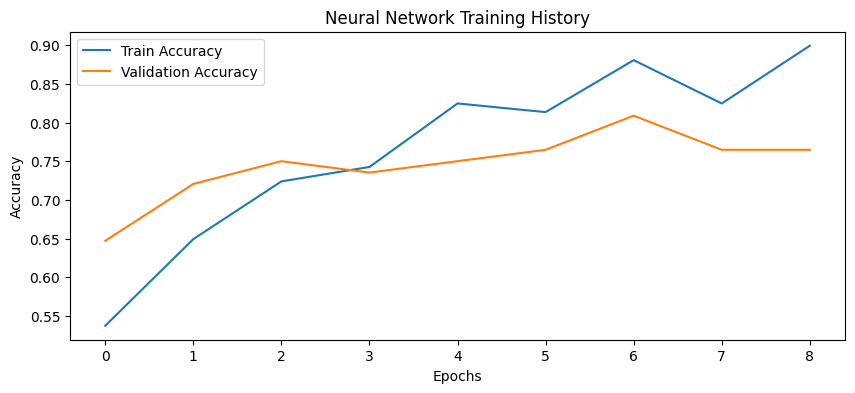

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Training History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predictions

In [26]:
prediction_data = pd.read_csv("prediction_data.csv")

#Splitting the Opponents Data
test_opps_data = prediction_data.filter(regex='opponent')

#Selecting the teams columns
test_teams_data = prediction_data.loc[:,~prediction_data.columns.str.contains('opponent')]

#selecting only the numeric columns
test_num_opps = test_opps_data.select_dtypes(include='number')
test_num_teams = test_teams_data.select_dtypes(include='number')

#Drop the season column from num_teams
test_num_teams = test_num_teams.drop(["season_x", "team_cluster", "season"], axis = 1)
test_num_opps = test_num_opps.drop("opponent_cluster", axis = 1)

#Scaling the Data
ss = StandardScaler()

#team data
test_ss_teams = ss.fit_transform(test_num_teams)

#opponents
test_ss_opp = ss.fit_transform(test_num_opps)

In [27]:
#Setting up the PCA using 27 components
pca_final = PCA(n_components=27)

#team pca
test_team_pca = pca_final.fit(test_ss_teams)
test_team_pca_final = test_team_pca.transform(test_ss_teams)


pca_opps_final = PCA(n_components=27)

#opp pca
opp_pca = pca_opps_final.fit(test_ss_opp)
test_opps_pca_final = opp_pca.transform(test_ss_opp)

In [28]:
# Assign opponent_cluster and team_cluster directly by index alignment
test_opps_data = test_opps_data.copy()
test_teams_data = test_teams_data.copy()

test_opps_data["opponent_cluster"] = test_opps_data.loc[test_opps_data.index, "opponent_cluster"]
test_teams_data["team_cluster"] = test_teams_data.loc[test_teams_data.index, "team_cluster"]

In [29]:
teams_cluster = test_teams_data["team_cluster"]
team_cluster_labels = teams_cluster.values.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)  # Set sparse=False to get a NumPy array
team_cluster_encoded = encoder.fit_transform(team_cluster_labels)

test_team_pca_final = np.hstack((test_team_pca_final, team_cluster_encoded))

opps_cluster = test_opps_data["opponent_cluster"]
opps_cluster_labels = opps_cluster.values.reshape(-1, 1)

opps_cluster_encoded = encoder.transform(opps_cluster_labels)

test_opps_pca_final = np.hstack((test_opps_pca_final, opps_cluster_encoded))

In [30]:
test_input_data = np.hstack((test_team_pca_final, test_opps_pca_final))

In [31]:
prediction_data["team_win_probability"] = nn_model.predict(test_input_data)

prediction_data.to_csv("predictions.csv")

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
